## Logistic regression with ROC curve and ROC AUC score 

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline

In [14]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [15]:
# Generate two class dataset
X,y = make_classification(n_samples=1000, n_classes=2, random_state=23)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.30,random_state=45)

In [17]:
# Generate a dummy model with default 0 as output
dummy_model_prob = [ 0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [18]:
# creating a basic logistic model
model = LogisticRegression()
model.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
# Preediction based on probability
model_prob = model.predict_proba(X_test)

In [20]:
# Lets focus on positive outcome
model_prob= model_prob[:,1] 

In [21]:
# Let's calculate the scores
dummy_model_auc = roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9692303924369954


In [22]:
# Calculate ROC Curve1
dummy_fpr, dummy_tpr, thresholds = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [23]:
model_fpr,model_tpr

(array([0.        , 0.        , 0.        , 0.00288184, 0.00288184,
        0.00576369, 0.00576369, 0.00864553, 0.00864553, 0.01152738,
        0.01152738, 0.01729107, 0.01729107, 0.02017291, 0.02017291,
        0.0259366 , 0.0259366 , 0.02881844, 0.02881844, 0.03170029,
        0.03170029, 0.03746398, 0.03746398, 0.04034582, 0.04034582,
        0.04322767, 0.04322767, 0.04610951, 0.04610951, 0.04899135,
        0.04899135, 0.0518732 , 0.0518732 , 0.05475504, 0.05475504,
        0.05763689, 0.05763689, 0.06628242, 0.06628242, 0.06916427,
        0.06916427, 0.0778098 , 0.0778098 , 0.08357349, 0.08357349,
        0.10086455, 0.10086455, 0.1037464 , 0.1037464 , 0.10951009,
        0.10951009, 0.11239193, 0.11239193, 0.11527378, 0.11527378,
        0.129683  , 0.129683  , 0.13256484, 0.13256484, 0.13544669,
        0.13544669, 0.15273775, 0.15273775, 0.1556196 , 0.1556196 ,
        0.16426513, 0.16426513, 0.17002882, 0.17002882, 0.17291066,
        0.17291066, 0.17579251, 0.17579251, 0.24

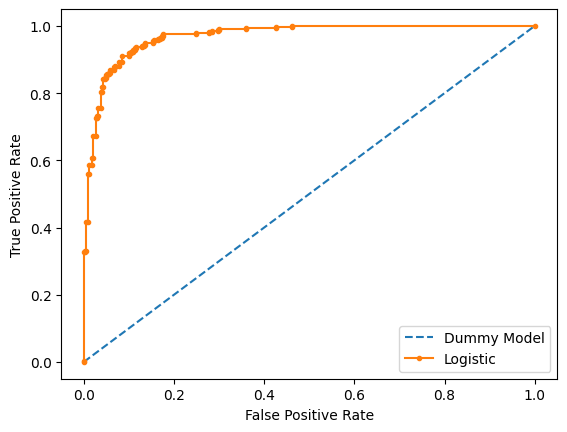

In [24]:
# Plot the ROC curve for the model
plt.plot(dummy_fpr,dummy_tpr,linestyle='--',label="Dummy Model")
plt.plot(model_fpr,model_tpr,marker='.',label="Logistic")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

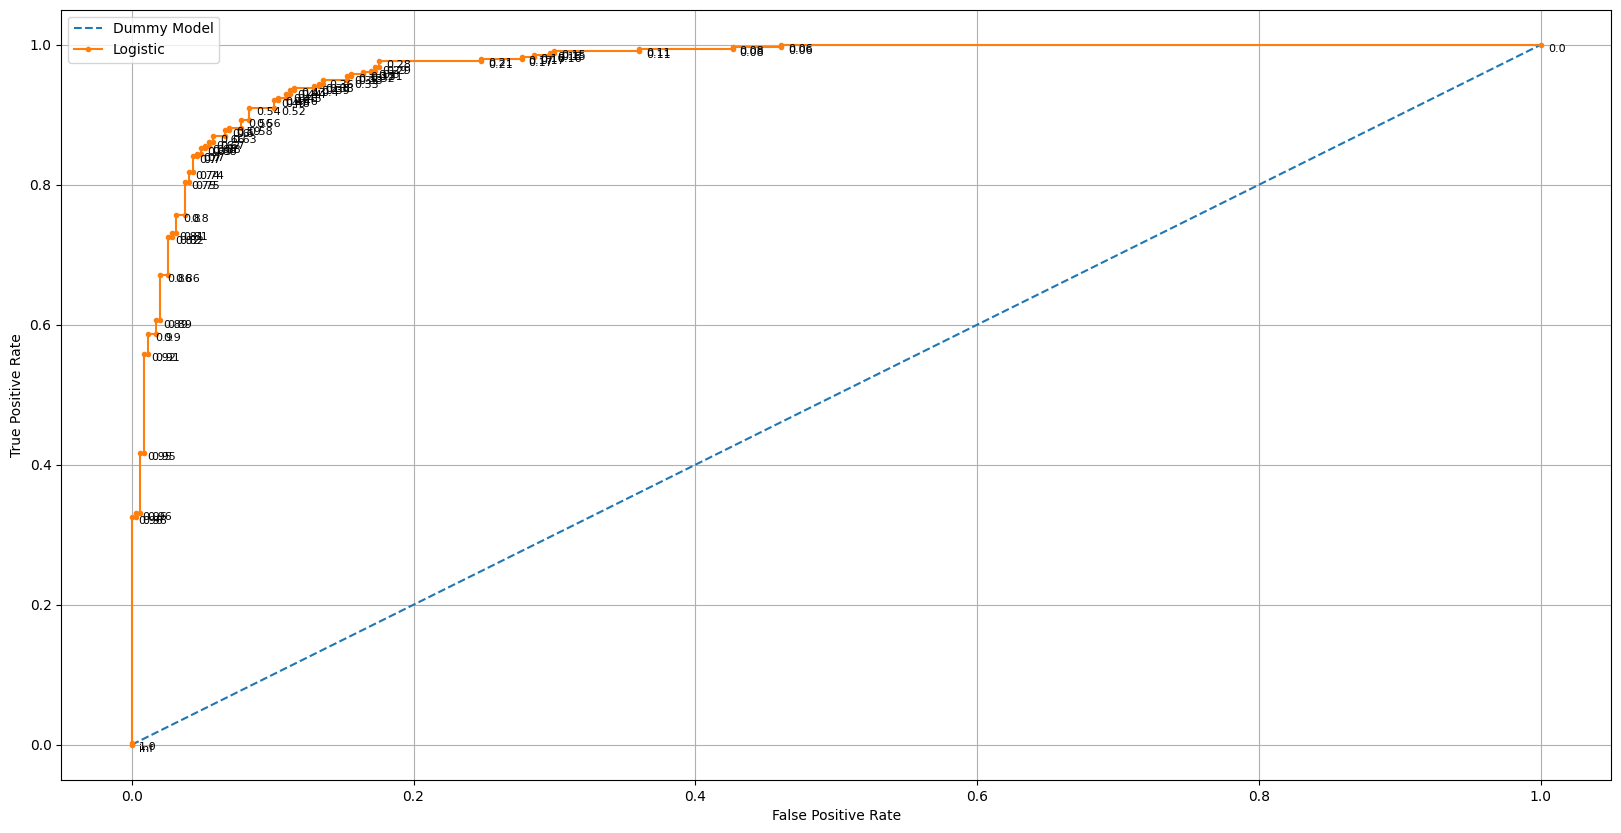

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)

ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label="Dummy Model")
ax.plot(model_fpr, model_tpr, marker='.', label="Logistic")

for fpr_val, tpr_val, thresh in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(thresh, 2)}', xy=(fpr_val, tpr_val), textcoords="offset points", xytext=(5, -5), fontsize=8)

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
plt.grid(True)
plt.show()
